# Welcome to Lab: GPA 🎓

In this lab, you'll explore the GPA dataset again to find out more about the courses at Illinois!

Fun fact: the dataset you're using in this lab is the same dataset that Professor Wade uses to make the GPA visualizations! :)  Check this out here if you haven't seen it already: [https://waf.cs.illinois.edu/discovery/grade_disparity_between_sections_at_uiuc/](https://waf.cs.illinois.edu/discovery/grade_disparity_between_sections_at_uiuc/)


A few tips to remember:

- **You are not alone on your journey in learning programming!**  You have your lab TA, your CAs, your lab group, and the professors (Prof. Wade and Prof. Karle), who are all here to help you out!
- If you find yourself stuck for more than a few minutes, ask a neighbor or course staff for help!  When you are giving help to your neighbor, explain the **idea and approach** to the problem without sharing the answer itself so they can have the same **<i>ah-hah</i>** moment!
- We are here to help you!  Don't feel embarrassed or shy to ask us for help!

Let's get started!

In [1]:
# Meet your CAs and TA if you haven't already!
# ...first name is enough, we'll know who they are! :)
ta_name = "Mallory"
ca1_name = "Irene"
ca2_name = "Amelie"
ca3_name = ""


# Say hello to each other!
# - Groups of 3 are ideal :)
# - However, groups of 2 or 4 are fine too!
#
# Question of the Day (QOTD) to Ask Your Group: "What's your favorite thing about fall?"
partner1_name = "Nina"
partner1_netid = "ninac5"
partner1_favfall = "the colors"

partner2_name = "Joanna"
partner2_netid = "joannaz4"
partner2_favfall = "the weather"

partner3_name = "Clement"
partner3_netid = "cyw4"
partner3_favfall= "weather"

<hr style="color: #DD3403;">

# Part 1: Exploring GPA

## Load the GPA Dataset

Before we begin exploring the GPA Dataset, we've got to load it in! The most recent version of the "GPA Dataset" (up to Winter 2024) is available here:
```
https://waf.cs.illinois.edu/discovery/gpa.csv
```

Use Python to load this dataset into a DataFrame called `df`:

In [2]:
import pandas as pd
df = pd.read_csv("https://waf.cs.illinois.edu/discovery/gpa.csv")
df

,Year,Term,YearTerm,Subject,Number,Course Title,Sched Type,A+,A,A-,...,C+,C,C-,D+,D,D-,F,W,Primary Instructor,Students
0,2024,Winter,2024-wi,ADV,150,Introduction to Advertising,ONL,22,18,1,...,0,0,0,0,0,0,0,0,"Hall, Steven R",42
1,2024,Winter,2024-wi,AFRO,100,Intro to African American St,ONL,5,8,6,...,0,1,1,0,0,0,1,0,"McMillion, Desiree Y",25
2,2024,Winter,2024-wi,ASTR,330,Extraterrestrial Life,ONL,1,16,8,...,1,0,2,0,1,0,0,0,"Dunne, Bryan C",37
3,2024,Winter,2024-wi,ATMS,120,Severe and Hazardous Weather,ONL,3,16,3,...,2,2,1,1,1,1,2,0,"Choate, Jessica J",46
4,2024,Winter,2024-wi,BADM,275,Operations Management,ONL,0,49,17,...,2,3,0,0,0,0,0,0,"Hu, Junqi",81
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69107,2010,Summer,2010-su,STAT,410,Statistics and Probability II,LEC,5,10,2,...,0,1,3,0,0,0,2,1,"Stepanov, Alexei G",31
69108,2010,Summer,2010-su,STAT,440,Statistical Data Management,LEC,4,12,8,...,0,0,0,0,0,0,0,0,"Unger, David",28
69109,2010,Summer,2010-su,TAM,212,Introductory Dynamics,LEC,0,1,3,...,5,1,1,0,2,0,1,0,"Morgan, William T",28
69110,2010,Summer,2010-su,TAM,251,Introductory Solid Mechanics,LCD,1,2,2,...,3,3,2,0,0,1,1,0,"Ott-Monsivais, Stephanie",21


### 🔬 Test Case Checkpoint 🔬

In [3]:
## == CHECKPOINT TEST CASES ==
# - This read-only cell contains test cases for your previous cell.
# - If this cell runs without any errors, you PASSED all test cases!
# - If this cell results in any errors, check your previous cell, make changes, and RE-RUN your code and then this cell.
assert(len(df) == 69112), "This is not the GPA dataset you're looking for."

## == SUCCESS MESSAGE ==
# You will only see this message (with the emoji showing) if you passed all test cases:
tada = "\N{PARTY POPPER}"
print(f"{tada} All tests passed! {tada}")

🎉 All tests passed! 🎉


### Puzzle 1.1: The "Average GPA" Column
Each row in the GPA Dataset represents a **course section** at Illinois. For our exploratory data analysis, we are going to need an additional `Average GPA` column.

To create this column, we need to compute the **weighted average GPA** for each course section by taking into account the **number of students** who received each letter grade.

Add this new `Average GPA` column to our DataFrame `df` by finding the **products** of the **weight** associated with each **letter grade** and the number of said **letter grade** earned in each course section, **summing these products**, and then **dividing** by the **number of students** in the course section.

Remember:
- The **weight** of letter grades are as follows: $[A+ = 4.0, A = 4.0, A- = 3.67, \ldots  D- = 0.67, F = 0]$. <br> You can find a full scale at: https://registrar.illinois.edu/courses-grades/explanation-of-grades/
- The `Students` column of our DataFrame contains the number of students in a course section
- You've done this in your Mastery Platform homework before, now you're doing it for real :) 

In [4]:
df['Average GPA'] = ((df['A+'])*4.0 + (df['A'])*4.0 + (df['A-'])*3.67 + (df['B+'])*3.33 + (df['B'])*3.00 + (df['B-'])*2.67 + (df['C+'])*2.33 + (df['C'])*2.00 + (df['C-'])*1.67 + (df['D+'])*1.33 + (df['D'])*1.00 + (df['D-'])*0.67) / (df['Students'])
df

,Year,Term,YearTerm,Subject,Number,Course Title,Sched Type,A+,A,A-,...,C,C-,D+,D,D-,F,W,Primary Instructor,Students,Average GPA
0,2024,Winter,2024-wi,ADV,150,Introduction to Advertising,ONL,22,18,1,...,0,0,0,0,0,0,0,"Hall, Steven R",42,3.968333
1,2024,Winter,2024-wi,AFRO,100,Intro to African American St,ONL,5,8,6,...,1,1,0,0,0,1,0,"McMillion, Desiree Y",25,3.467600
2,2024,Winter,2024-wi,ASTR,330,Extraterrestrial Life,ONL,1,16,8,...,0,2,0,1,0,0,0,"Dunne, Bryan C",37,3.495946
3,2024,Winter,2024-wi,ATMS,120,Severe and Hazardous Weather,ONL,3,16,3,...,2,1,1,1,1,2,0,"Choate, Jessica J",46,3.108696
4,2024,Winter,2024-wi,BADM,275,Operations Management,ONL,0,49,17,...,3,0,0,0,0,0,0,"Hu, Junqi",81,3.712346
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69107,2010,Summer,2010-su,STAT,410,Statistics and Probability II,LEC,5,10,2,...,1,3,0,0,0,2,1,"Stepanov, Alexei G",31,3.183226
69108,2010,Summer,2010-su,STAT,440,Statistical Data Management,LEC,4,12,8,...,0,0,0,0,0,0,0,"Unger, David",28,3.774643
69109,2010,Summer,2010-su,TAM,212,Introductory Dynamics,LEC,0,1,3,...,1,1,0,2,0,1,0,"Morgan, William T",28,2.595714
69110,2010,Summer,2010-su,TAM,251,Introductory Solid Mechanics,LCD,1,2,2,...,3,2,0,0,1,1,0,"Ott-Monsivais, Stephanie",21,2.603333


### 🔬 Test Case Checkpoint 🔬

In [5]:
## == TEST CASES for Puzzle 1.1 ==
# - This read-only cell contains test cases for your previous cell.
# - If this cell runs without any error or output, you PASSED all test cases!
# - If this cell results in any errors, check your previous cell, make changes, and RE-RUN your code and then this cell.
import math
assert( len(df) == 69112  ), "You shouldn't be changing the length of `df` when computing Average GPA."
assert( "Average GPA" in df.columns), "Make sure your new column is named 'Average GPA'."
assert( math.isclose(df['Average GPA'].mean(), 3.3790213685614776)), "Your calculation of the Average GPA is incorrect."

## == SUCCESS MESSAGE ==
# You'll only see this message (With the emoji showing) if you passed all test cases:
tada = "\N{PARTY POPPER}"
print(f"{tada} All tests passed! {tada}")

🎉 All tests passed! 🎉


### Puzzle 1.2: The "Hardest" and "Easiest" Courses?
One way to judge a course's difficulty is to consider its **Average GPA**. 

Using the `Average GPA` column and the two cells below, find:
- The **50** courses with the **lowest** `Average GPA`, storing in the DataFrame `df_hard`
- The **50** courses with the **highest** `Average GPA`, storing the DataFrame `df_easy` 

In [6]:
df_hard = df.nsmallest(50, 'Average GPA')
df_hard 

,Year,Term,YearTerm,Subject,Number,Course Title,Sched Type,A+,A,A-,...,C,C-,D+,D,D-,F,W,Primary Instructor,Students,Average GPA
9053,2022,Spring,2022-sp,GS,199,College Academic Success,LCD,1,0,0,...,2,0,2,1,2,12,0,"Walk, Aaron J",26,1.140385
27054,2018,Fall,2018-fa,LER,120,Contemporary Labor Problems,ONL,0,0,1,...,1,2,1,1,0,15,0,"Taylor, Don",28,1.142857
11058,2021,Fall,2021-fa,CLCV,100,Vocab Building-GRK & LAT Roots,ONL,2,0,3,...,1,0,1,2,3,20,0,"Augoustakis, Antonios",40,1.208750
39524,2016,Spring,2016-sp,LER,100,Introduction to Labor Studies,ONL,0,1,0,...,4,1,1,1,1,10,0,"Hawking, Carol J",24,1.319583
47323,2014,Fall,2014-fa,LER,120,Contemporary Labor Problems,ONL,0,4,0,...,4,1,0,1,0,15,1,"Hershfield, David",30,1.400000
12160,2021,Fall,2021-fa,LER,100,Introduction to Labor Studies,ONL,0,1,0,...,3,0,2,0,1,11,0,"Ashby, Steven",26,1.410385
49591,2014,Spring,2014-sp,LER,120,Contemporary Labor Problems,ONL,0,1,3,...,3,0,0,0,2,11,0,"Cohen, Margaret L",25,1.427600
52380,2013,Fall,2013-fa,MATH,2,Introductory Algebra,LCD,0,0,0,...,10,5,3,3,2,5,3,"Aydin-Mullen, Yelda",31,1.430645
49666,2014,Spring,2014-sp,MATH,220,Calculus,LBD,0,3,0,...,5,0,2,1,0,11,1,"Gilbert, Rebekah A",28,1.476071
24326,2019,Spring,2019-sp,LER,100,Introduction to Labor Studies,ONL,0,2,1,...,0,0,0,2,1,9,0,"Cohen, Margaret L",21,1.491905


In [7]:
df_easy = df.nlargest(50, 'Average GPA')
df_easy

,Year,Term,YearTerm,Subject,Number,Course Title,Sched Type,A+,A,A-,...,C,C-,D+,D,D-,F,W,Primary Instructor,Students,Average GPA
25230,2019,Summer,2019-su,IS,532,Theory & Pract Data Cleaning,ONL,266,18,1,...,0,0,0,0,0,0,0,"Ludaescher, Bertram",286,3.995350
15304,2021,Summer,2021-su,IS,537,Theory & Prct of Data Cleaning,ONL,407,9,0,...,0,0,0,0,0,0,0,NaN,419,3.995203
7310,2022,Fall,2022-fa,MUSC,487,Marching Illini,PR,0,289,0,...,0,0,0,0,0,0,1,"Houser, Barry L",291,3.993127
38182,2016,Spring,2016-sp,ACCY,398,Practical Problems in Atg,ONL,139,1,0,...,0,0,0,0,0,0,0,"Nekrasz, Frank",141,3.992908
34099,2017,Spring,2017-sp,EPSY,490,Prep for Recruitment Counselor,NaN,69,14,0,...,0,0,0,0,0,0,0,"Brown, Dawn M",84,3.992024
47603,2014,Fall,2014-fa,ME,199,Automotive Design Projects,LBD,8,111,0,...,0,0,0,0,0,0,0,"Philpott, Michael L",120,3.991667
35685,2016,Fall,2016-fa,ANSC,103,Working With Farm Animals,NaN,0,79,0,...,0,0,0,0,0,0,0,"Cobb, Alan R",80,3.991625
40650,2015,Fall,2015-fa,ANSC,103,Working With Farm Animals,LEC,0,76,0,...,0,0,0,0,0,0,0,"Cobb, Alan R",77,3.991299
10117,2022,Spring,2022-sp,VCM,673,Companion Animal Rehab,LCD,69,2,0,...,0,0,0,0,0,0,0,"Knap, Kimberly E",72,3.990694
57664,2012,Fall,2012-fa,MUS,273,Marching Illini,PR,0,308,0,...,0,0,0,0,0,0,0,"Houser, Barry L",311,3.990354


Now, using your two new DataFrames (`df_hard` and `df_easy`), find:
- The **mean course number** of the 50 hardest courses by GPA, storing in the variable `hard_avg`
- The **mean course number** of the 50 easiest courses by GPA, storing in the variable `easy_avg`

The **course number** of a course is stored in the `Number` column of our DataFrames. 

In [8]:
hard_avg = df_hard['Number'].mean()
hard_avg

np.float64(167.22)

In [9]:
easy_avg = df_easy['Number'].mean()
easy_avg

np.float64(372.96)

### 🔬 Test Case Checkpoint 🔬

In [10]:
## == TEST CASE for Puzzle 1.2 ==
# - This read-only cell contains test cases for your previous cell.
# - If this cell runs without any error or output, you PASSED all test cases!
# - If this cell results in any errors, check your previous cell(s), make changes, and RE-RUN your code and then this cell.
import math
assert( len(df_hard) == len(df_easy) == 50 ), "Your df_hard and df_easy should be picking the 50 courses with the lowest / highest average GPA respectively. Please double check that you are selecting 50 courses."
assert( math.isclose(df_hard['Average GPA'].sum(), 80.3858156565443) ), "Your df_hard is calculated incorrectly. Make sure you are finding the 50 courses with the lowest Average GPA."
assert( math.isclose(df_easy['Average GPA'].sum(), 199.39636832538582) ), "Your df_easy is calculated incorrectly. Make sure you are finding the 50 courses with the highest Average GPA."
assert( math.isclose(hard_avg, 167.22) ), "Your calculation for the average course number of 'hard' courses is incorrect. Make sure you are finding the mean of course numbers of df_hard."
assert( math.isclose(easy_avg, 372.96) or math.isclose(easy_avg, 375.56)), "Your calculation for the average course number of 'easy' courses is incorrect. Make sure you are finding the mean of course numbers of df_easy."

## == SUCCESS MESSAGE ==
# You'll only see this message (With the emoji showing) if you passed all test cases:
tada = "\N{PARTY POPPER}"
print(f"{tada} All tests passed! {tada}")

🎉 All tests passed! 🎉


### Analysis: "Hardest" and "Easiest" Courses? 

**Q1: After solving Puzzle 1.2, your friend has the following claim:**

> *"We know that the undergraduate courses are coded from 001 to 499, where a larger number (in the hundreds place) usually implies more advanced material.  Based on our results in the previous puzzles, the data shows that the junior-level and senior-level courses are clearly not the hardest courses at UIUC."*

**Comment on your friend's claim below. Do you think they are correct? Explain why or why not with specific data you found.**

The data shows that on average, the course number of the 50 courses with the lowest GPA is around 167.22, meaning that most if not all of those 50 courses are in the 100-200s range. The data also shows that on average, the course number of the 50 courses with the highest GPA is around 372.96, meaning that most if not all of those 50 courses are in the 300s-400s range. Based on the data, since the 300s-400s courses are the junior-level and senior-level courses, I think my friend is correct that those courses aren’t the hardest courses at UIUC. However, we can note that the data doesn’t account for the fact that juniors and seniors have been in college longer than freshmen, so they’ve had more time to adjust to difficult courses and have better study techniques, and that could explain why junior-level and senior-level courses have higher GPA. 


<hr style="color: #DD3403;">

# Part 2: GPA By Subject
We've explored some of the GPA Dataset as a whole, but what if we want to investigate **differences in GPA by subject**? 

### Puzzle 2.1: Grouping by Subject
To look into the different Average GPAs for each subject, we need to **group** our DataFrame. 

In the following cell, create a new DataFrame, `df_subject`, which will contain data from `df` grouped by `Subject` so **each letter grade column** contains the **total number of students** receiving the same grade in that `Subject`. 

**NUMERIC ONLY**: For the agg function in the lab, we want to aggregate only the numeric columns:
- To do this, when you use `.agg("...")`, include the option `numeric_only=True`.
- For example, to aggregate by `sum`, you would use: `.agg("sum", numeric_only=True)`.
- Another example: to aggregate by `count`, you would use: `.agg("count", numeric_only=True)`.

**DO I USE `count` or `sum`?**:
- Each row in `df` represents a **course section** of a `Subject` with the **number of students** receiving grades for that course.
- Do you want to "count" the number of rows, or "sum" the number of students receiving each grade?
- And, don't forget to `.reset_index()`. :)

In [11]:
df_subject = df.groupby('Subject').agg('sum', numeric_only=True).reset_index()
df_subject

,Subject,Year,Number,A+,A,A-,B+,B,B-,C+,C,C-,D+,D,D-,F,W,Students,Average GPA
0,AAS,494134,30940,1050,2829,1053,658,644,308,165,169,70,39,44,26,132,26,7187,859.495654
1,ABE,334747,55405,584,3332,912,830,987,260,148,194,50,21,52,9,74,19,7453,584.234785
2,ACCY,5737609,1079894,15871,36922,21865,19613,18654,7728,3912,3196,1579,439,876,294,953,363,131902,9688.130625
3,ACE,2290983,320492,8769,19270,6845,5559,9093,3328,2156,3124,1032,497,882,294,993,152,61842,3761.774442
4,ACES,383227,22012,1612,2095,393,197,316,87,92,94,40,25,34,19,94,10,5098,698.842235
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
169,UP,729992,128783,1483,4977,2508,1437,1509,591,317,339,161,51,103,71,248,39,13795,1270.733115
170,VB,8040,2489,0,212,6,6,120,1,0,40,0,0,2,0,0,0,387,13.974534
171,VCM,110864,34284,547,1687,35,63,1087,20,23,349,1,1,40,0,7,2,3860,196.410821
172,VM,258207,78366,0,2879,8,0,7981,1,0,4725,0,0,554,0,21,10,16169,362.899891


### 🔬 Test Case Checkpoint 🔬

In [12]:
## == TEST CASE for Puzzle 2.1 ==
# - This read-only cell contains test cases for your previous cell.
# - If this cell runs without any error or output, you PASSED all test cases!
# - If this cell results in any errors, check your previous cell(s), make changes, and RE-RUN your code and then this cell.
import math
assert( len(df) == 69112  ), "Make sure to store your grouped data in `df_subject`."
assert( 'df_subject' in vars() ), "Make sure your DataFrame grouped by 'Subject' is named 'df_subject'." 
assert( len(df_subject) == 174 ), "Make sure you are grouping by 'Subject'. There are 172 Subjects in our original `df`, so the length of `df_subject` should be 172."
assert( math.isclose(df_subject.Students.mean(), 23685.287356321838) ), "Double-check that you are aggregating your df_subject correctly."
assert( "Subject" in df_subject.columns ), "Make sure to do .reset_index()."


## == SUCCESS MESSAGE ==
# You'll only see this message (With the emoji showing) if you passed all test cases:
tada = "\N{PARTY POPPER}"
print(f"{tada} All tests passed! {tada}")



🎉 All tests passed! 🎉


### Puzzle 2.2: Fixing our `Average GPA` Column
Your intuition may tell you that some columns in `df_subject` look off. This is correct - given the way we've grouped the data to find **total student counts** by grade, the `Year` and `Average GPA` columns are incorrect. 

Let's fix this by redefining the `Average GPA` column in our `df_subject`. We've given you the code to do this since you already did it in Puzzle 1.1. You can see it's the exact same process; we're just using `df_subject` this time!

**Run the cell below** to redefine the `Average GPA` column in `df_subject`.

In [13]:
df_subject['Average GPA'] = (df_subject['A+'] * 4 + df_subject['A'] * 4 + df_subject['A-'] * 3.67 
                    + df_subject['B+'] * 3.33 + df_subject['B'] * 3 + df_subject['B-'] * 2.67 
                    + df_subject['C+'] * 2.33 + df_subject['C'] * 2 + df_subject['C-'] * 1.67 
                    + df_subject['D+'] * 1.33 + df_subject['D'] * 1 + df_subject['D-'] * 0.67 + df_subject['F'] * 0) / df_subject['Students']
df_subject

,Subject,Year,Number,A+,A,A-,B+,B,B-,C+,C,C-,D+,D,D-,F,W,Students,Average GPA
0,AAS,494134,30940,1050,2829,1053,658,644,308,165,169,70,39,44,26,132,26,7187,3.517274
1,ABE,334747,55405,584,3332,912,830,987,260,148,194,50,21,52,9,74,19,7453,3.533133
2,ACCY,5737609,1079894,15871,36922,21865,19613,18654,7728,3912,3196,1579,439,876,294,953,363,131902,3.435311
3,ACE,2290983,320492,8769,19270,6845,5559,9093,3328,2156,3124,1032,497,882,294,993,152,61842,3.342199
4,ACES,383227,22012,1612,2095,393,197,316,87,92,94,40,25,34,19,94,10,5098,3.659425
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
169,UP,729992,128783,1483,4977,2508,1437,1509,591,317,339,161,51,103,71,248,39,13795,3.467809
170,VB,8040,2489,0,212,6,6,120,1,0,40,0,0,2,0,0,0,387,3.448760
171,VCM,110864,34284,547,1687,35,63,1087,20,23,349,1,1,40,0,7,2,3860,3.467158
172,VM,258207,78366,0,2879,8,0,7981,1,0,4725,0,0,554,0,21,10,16169,2.813719


### 🔬 Test Case Checkpoint 🔬

In [14]:
## == TEST CASES for Puzzle 2.2 ==
# - This read-only cell contains test cases for your previous cell.
# - If this cell runs without any error or output, you PASSED all test cases!
# - If this cell results in any errors, check your previous cell, make changes, and RE-RUN your code and then this cell.
import math
assert( len(df_subject) == 174 ), "You shouldn't be changing the length of `df_subject` when recomputing Average GPA."
assert( "Average GPA" in df_subject.columns), "Make sure your column is still named 'Average GPA'."
assert( math.isclose(df_subject['Average GPA'].mean(), 3.474516261357219) ), "Your calculation of the Average GPA by Subject is incorrect."

## == SUCCESS MESSAGE ==
# You'll only see this message (With the emoji showing) if you passed all test cases:
tada = "\N{PARTY POPPER}"
print(f"{tada} All tests passed! {tada}")

🎉 All tests passed! 🎉


### Puzzle 2.3: The "Hardest" and "Easiest" Subjects?
One way we can judge a Subject's difficulty is to consider its **Average GPA**. 

Using your `df_subject`'s  `Average GPA` column and the two cells below, find:
- The **10** Subjects with the **lowest** `Average GPA`, storing in the DataFrame `hard_subjects`
- The **10** Subjects with the **highest** `Average GPA`, storing the DataFrame `easy_subjects` 

In [15]:
hard_subjects = df_subject.nsmallest(10, 'Average GPA')
hard_subjects

,Subject,Year,Number,A+,A,A-,B+,B,B-,C+,C,C-,D+,D,D-,F,W,Students,Average GPA
172,VM,258207,78366,0,2879,8,0,7981,1,0,4725,0,0,554,0,21,10,16169,2.813719
116,MATH,5397267,832939,17421,41455,24395,24080,30581,18419,15424,18005,9452,5305,6649,2814,8829,1708,222829,2.914632
163,TAM,756169,116920,2781,6258,4630,4418,5187,3370,2647,2782,1606,981,1141,532,1278,177,37611,2.914962
149,SAME,6039,437,2,29,30,20,31,12,14,17,5,2,2,3,5,1,172,2.949884
134,PHYS,2068965,296574,18974,20537,13762,12745,13086,11715,9543,9335,6985,4361,3172,3644,2021,797,129880,2.968218
108,LAT,10065,510,13,18,15,12,18,6,11,5,2,1,2,1,7,0,111,2.990991
40,CHBE,683827,142076,996,4646,2512,2389,4050,1933,1493,2406,867,179,409,78,310,86,22268,3.030871
41,CHEM,3864516,374605,20644,56056,23207,21953,28416,16803,15106,17592,9803,4843,4997,2729,5250,1431,227399,3.057198
133,PHIL,1177027,102123,1099,4656,3616,2922,2860,1756,955,830,483,213,286,216,949,132,20841,3.104231
118,MCB,4862019,614869,10349,18085,14739,13683,15368,9293,6767,6117,3494,2052,1612,929,1460,436,103948,3.108367


In [16]:
easy_subjects = df_subject.nlargest(10, 'Average GPA')
easy_subjects

,Subject,Year,Number,A+,A,A-,B+,B,B-,C+,C,C-,D+,D,D-,F,W,Students,Average GPA
125,MUSC,93024,21812,250,2551,58,28,55,9,2,14,2,0,5,0,15,4,2989,3.927779
38,CB,4022,1250,0,140,0,0,17,0,0,1,0,0,0,0,0,2,158,3.879747
37,BUS,869655,62697,1906,10153,1507,652,400,121,58,55,17,17,21,12,42,15,14961,3.862449
68,ERAM,18201,5072,63,138,40,13,9,1,1,0,0,0,1,0,0,0,266,3.861241
127,NE,2023,100,15,4,6,2,1,0,0,0,0,0,0,0,0,0,28,3.845714
168,UKR,10070,565,10,206,46,21,9,4,0,1,0,0,0,1,0,2,298,3.835906
44,CHP,44439,4575,210,299,52,17,24,4,2,6,1,1,0,0,6,1,622,3.835675
141,REES,6047,603,32,34,7,2,5,2,0,0,0,0,1,0,0,0,83,3.827590
65,EPOL,216332,50302,506,2821,394,144,99,39,21,23,12,2,15,1,58,9,4135,3.813284
64,EOL,116933,31442,93,1340,264,123,100,12,4,9,0,0,6,0,10,3,1961,3.812254


### 🔬 Test Case Checkpoint 🔬

In [17]:
## == TEST CASES for Puzzle 2.3 ==
# - This read-only cell contains test cases for your previous cell.
# - If this cell runs without any error or output, you PASSED all test cases!
# - If this cell results in any errors, check your previous cell, make changes, and RE-RUN your code and then this cell.
import math
assert( len(hard_subjects) == len(easy_subjects) == 10 ), "Make sure you are selecting the ten hardest or easiest subjects by GPA. This means your hard_subjects and easy_subjects DataFrames should both have exactly ten rows."
assert( math.isclose(hard_subjects['Average GPA'].sum(), 29.853073007169176) ), "Your calculation for the hardest subjects by GPA is incorrect. Remember, here harder = lower Average GPA."
assert( math.isclose(easy_subjects['Average GPA'].sum(), 38.50163903261125) ), "Your calculation for the easiest subjects by GPA is incorrect. Remember, here easier = higher Average GPA."

## == SUCCESS MESSAGE ==
# You'll only see this message (With the emoji showing) if you passed all test cases:
tada = "\N{PARTY POPPER}"
print(f"{tada} All tests passed! {tada}")

🎉 All tests passed! 🎉


### Analysis: "Hardest" and "Easiest" Subjects? 

**Q2: Observe the `Subject` column of the `hard_subjects` and `easy_subjects` you've found in Puzzle 2.3 above. Do you think these are truly the "Hardest" and "Easiest" subjects at Illinois? Explain why or why not.** 


*Note: You can use http://catalog.illinois.edu/courses-of-instruction/ to find what the different `Subject` codes mean.*


I would agree with the data since many of the subject codes in the hard_subjects dataframe are difficult STEM courses, like Math and Physics, which are known for being hard since they're a part of engineering. In comparion, the subject codes in the easy_subjects dataframe are Music and Education, which aren't necessarily easy majors but are easier than engineering. However we don't know if the subjects are sorted by freshman-sophomore and junior-senior classes. The hard_subjects dataframe may be full of junior-senior classes, which can be more difficult than freshman-sophomore. 

### Puzzle 2.4: Visualizing GPA by Subject
We've got the **Average GPA** of each `Subject` at Illinois, but what if we want to look at the **bigger picture** across all subjects? Well, data visualization comes to the rescue!

Generate a **histogram** of the **Average GPA** in your `df_subject`:

<Axes: >

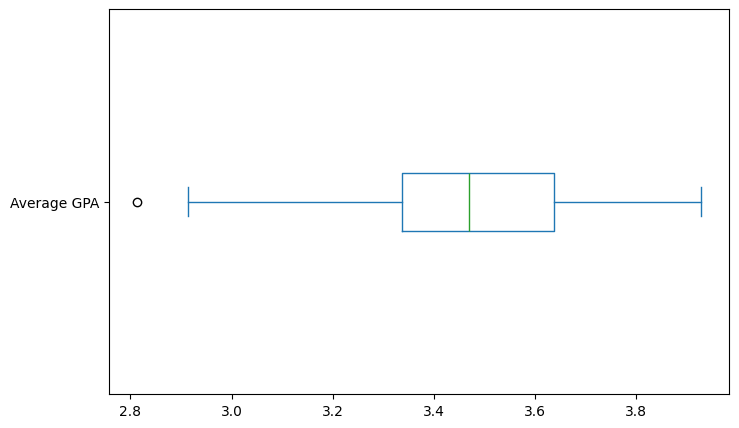

In [18]:
df_subject['Average GPA'].plot.box(vert=False, figsize=(8, 5))


### Analysis: Histogram Interpretations

**Q3: Based on the histogram you generated above, what is an estimate of the Average GPA across all courses in a typical subject at Illinois is? No need for an exact answer, just estimate.** 


The average GPA across all courses in a typical subject at Illinois is around 3.5 

### Puzzle 2.5: Your Major! 
We've done a lot of analysis on every course and every subject, but Data Science should also be personal to you!

Using your `df_subject`, isolate the row containing the `Subject` of **your Major**, storing in the variable `my_subject`:

(If you're undecided, you can pick any `Subject`!)

In [19]:
my_subject = df_subject[df_subject['Subject'] == 'CS']
my_subject

,Subject,Year,Number,A+,A,A-,B+,B,B-,C+,C,C-,D+,D,D-,F,W,Students,Average GPA
50,CS,4464568,727386,33403,84897,29133,20895,22971,11179,7879,9379,4279,2338,3738,1343,5270,1207,236704,3.381729


### Analysis: Your Major's Average GPA

**Q4: Observe the `Average GPA` column of your subject from Puzzle 2.5 above. Is it higher or lower than you expected?** 


The average GPA is 3.38, which is lower than I expected, because CS is incredibly difficult but most people actually put the effort in so the GPA tends to be high but not perfectly at a 4.0. I expected around a 3.5 GPA. 

<hr style="color: #DD3403;">

# Part 3: GPA By Year
At this point, we've investigated the GPA Dataset as a whole and grouped by `Subject`. While our GPA Dataset contains **a lot** of course data, some of the listed courses are quite old: **dating back to 2010**! To put that into perspective, a senior in college now would be no more than **8 years old** in 2010. 

One can question the changes to GPA **over time**. Some questions may include:
- Has GPA gone up, because classes became "easier"? 
- Has the GPA fallen because of stricter grading policies? 
- How was GPA impacted in 2019-2020 at the brunt of COVID? 

You will gain some insight into the answers to questions in this section of the lab. 

### Puzzle 3.1: Grouping by Year
To look into how the GPA changes by `Year`, we need to again **group** our DataFrame. 

In the following cell, create a new DataFrame, `df_year`, which will contain this grouped GPA data. Using `df.groupby()`, **group** our original DataFrame (`df`) by `Year` so each **letter grade column** contains the **total number of students** receiving said grade in that `Year`. 

Remember: You did something quite similar in Puzzle 2.1 to create `df_subject`. This might help you decide what type of **aggregation** (`.agg()`) to use when **grouping**.
- In this puzzle, you should also use `numeric_only=True` in your `agg` function, just like in Puzzle 2.1.
- And, don't forget to `.reset_index()`! :)

In [20]:
df_year = df.groupby('Year').agg('sum', numeric_only=True).reset_index()
df_year

,Year,Number,A+,A,A-,B+,B,B-,C+,C,C-,D+,D,D-,F,W,Students,Average GPA
0,2010,1493480,19355,77012,36814,30579,43517,17195,11604,15753,5812,2975,4438,1506,4511,1404,271071,17983.181282
1,2011,1435567,19569,75526,36462,30987,42453,16776,11351,15844,6243,2910,4513,1679,4751,1200,269064,17216.397879
2,2012,822949,11834,44738,20603,17041,22408,9485,6515,8221,3307,1690,2218,936,2681,626,151677,9532.509354
3,2013,1468576,22541,81114,37513,30624,40241,17471,11611,14875,6367,3103,4263,1851,4895,1072,276469,16764.437980
4,2014,1440554,25081,79289,36792,30749,38679,17724,11713,14802,6579,3252,4640,2073,5363,1292,276736,16367.567458
5,2015,1516560,29032,87101,39378,31895,40221,18172,12281,14891,6576,3550,4528,2050,5572,1317,295247,17371.653103
6,2016,1452803,29094,85548,37962,30278,37678,16759,11590,14199,6114,3333,4271,1964,5785,1254,284575,16591.965208
7,2017,1513420,34941,92166,38295,29889,37541,16494,11117,14270,6130,3254,4600,2014,6151,1289,296862,17119.212533
8,2018,1509424,40112,98711,39621,29546,35837,16123,10809,13421,5949,3339,4350,2042,6253,1131,306113,17005.301120
9,2019,1528969,41642,104139,40875,30890,37332,16680,11203,13623,6117,3283,4434,2212,6914,1146,319344,16983.843455


### 🔬 Test Case Checkpoint 🔬

In [21]:
## == TEST CASE for Puzzle 3.1 ==
# - This read-only cell contains test cases for your previous cell.
# - If this cell runs without any errors, you PASSED all test cases!
# - If this cell results in any errors, check your previous cell, make changes, and RE-RUN your code and then this cell.
import math
assert( 'df_year' in vars() ), "Make sure your DataFrame grouped by Year is named 'df_year'." 
assert( len(df_year) == 15 ), "Make sure you are grouping by 'Year'. There are 15 years in our original `df`, so the length of `df_years` should be 15."
assert( math.isclose(df_year.Students.mean(), 274749.3333333333) ), "Double-check that you are aggregating your df_year correctly."

## == SUCCESS MESSAGE ==
# You will only see this message (with the emoji showing) if you passed all test cases:
tada = "\N{PARTY POPPER}"
print(f"{tada} All tests passed! {tada}")

🎉 All tests passed! 🎉


### Puzzle 3.2: Fixing our `Average GPA` Column Again
Some columns in `df_year` are incorrectly calculated given the way we've grouped the data.

Let's fix this by redefining the `Average GPA` column in our `df_year`. This is just like what we did in Puzzle 1.1 and 2.2, so we've provided the code to do this. Observe how the only thing that is different from before is the DataFrame being used.

**Run the cell below** to redefine the `Average GPA` column in `df_year`.

In [26]:
df_year['Average GPA'] = (df_year['A+'] * 4 + df_year['A'] * 4 + df_year['A-'] * 3.67 
                    + df_year['B+'] * 3.33 + df_year['B'] * 3 + df_year['B-'] * 2.67 
                    + df_year['C+'] * 2.33 + df_year['C'] * 2 + df_year['C-'] * 1.67 
                    + df_year['D+'] * 1.33 + df_year['D'] * 1 + df_year['D-'] * 0.67 + df_year['F'] * 0) / df_year['Students']
df_year



,Year,Number,A+,A,A-,B+,B,B-,C+,C,C-,D+,D,D-,F,W,Students,Average GPA
0,2010,1493480,19355,77012,36814,30579,43517,17195,11604,15753,5812,2975,4438,1506,4511,1404,271071,3.233537
1,2011,1435567,19569,75526,36462,30987,42453,16776,11351,15844,6243,2910,4513,1679,4751,1200,269064,3.224523
2,2012,822949,11834,44738,20603,17041,22408,9485,6515,8221,3307,1690,2218,936,2681,626,151677,3.253189
3,2013,1468576,22541,81114,37513,30624,40241,17471,11611,14875,6367,3103,4263,1851,4895,1072,276469,3.250664
4,2014,1440554,25081,79289,36792,30749,38679,17724,11713,14802,6579,3252,4640,2073,5363,1292,276736,3.239539
5,2015,1516560,29032,87101,39378,31895,40221,18172,12281,14891,6576,3550,4528,2050,5572,1317,295247,3.266565
6,2016,1452803,29094,85548,37962,30278,37678,16759,11590,14199,6114,3333,4271,1964,5785,1254,284575,3.275508
7,2017,1513420,34941,92166,38295,29889,37541,16494,11117,14270,6130,3254,4600,2014,6151,1289,296862,3.301601
8,2018,1509424,40112,98711,39621,29546,35837,16123,10809,13421,5949,3339,4350,2042,6253,1131,306113,3.337883
9,2019,1528969,41642,104139,40875,30890,37332,16680,11203,13623,6117,3283,4434,2212,6914,1146,319344,3.339275


### 🔬 Test Case Checkpoint 🔬

In [23]:
## == TEST CASE for Puzzle 3.2 ==
# - This read-only cell contains test cases for your previous cell.
# - If this cell runs without any errors, you PASSED all test cases!
# - If this cell results in any errors, check your previous cell, make changes, and RE-RUN your code and then this cell.
import math
assert( len(df_year) == 15 ), "You shouldn't be changing the length of `df_year` when recomputing Average GPA."
assert( "Average GPA" in df_year.columns), "Make sure your column is still named 'Average GPA'."
assert( math.isclose(df_year['Average GPA'].mean(), 3.349768485675631) ), "Your calculation of the Average GPA by Year is incorrect."

## == SUCCESS MESSAGE ==
# You will only see this message (with the emoji showing) if you passed all test cases:
tada = "\N{PARTY POPPER}"
print(f"{tada} All tests passed! {tada}")

🎉 All tests passed! 🎉


### Puzzle 3.3: Visualizing GPA over Time
We now have the data of the `Average GPA` across the University over time in years. Using this data, we can generate yet another visualization built-in to Pandas to visualize this data: a **line plot**! 

You can plot a **connected line** that draws your **numeric data** from a DataFrame, `df`, using the syntax:

&emsp;`df.plot.line(x='column1', y='column2')`

This line of code plots the line and specifies the **column names** to be used for the **x-values** and **y-values** of the points on your line plot.


In the cell below, using similar syntax, plot the **average GPA over time** using `df_year`. 

*Hint: the `Year` column should provide **x-values** and the `Average GPA` column should provide **y-values**.*

<Axes: xlabel='Year'>

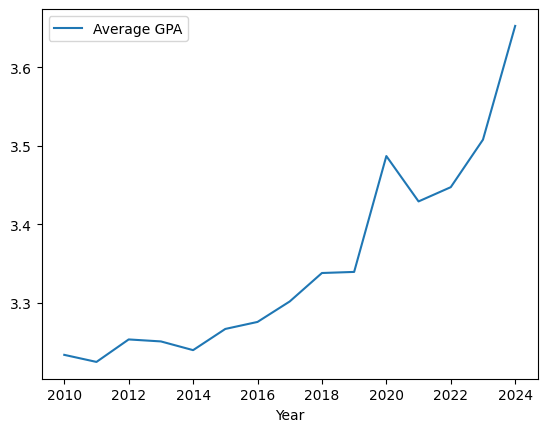

In [24]:
df_year.plot.line(x='Year', y='Average GPA')

***Side Note***: If you're using **Visual Studio Code** on **dark mode**, you may not be able to see the **axes** and **axes labels** of the graph. 

**Only if** this is the case, please **copy and run** the following **two lines** of code in a cell:

---
```py
from matplotlib import style
style.use('dark_background')
```
---

And then **re-run your plotting code** above. 

### Analysis: Plotted GPA over Time

Note a few observations you have about the changes to `Average GPA` at Illinois over time, and answer the two following questions, making sure to use specific data and values in your answer:
- **(5a): Is there an overall trend?**
- **(5b): What events could have spiked increases to the Average GPA?**



The overall trend is that the Average GPA has increased from 2010 to 2024. One event that could have spiked increases to the Average GPA, especially near 2020, was the COVID pandemic when classes were online. Most classes then were pass-fail and it was much easier to pass classes, as many students used online resources and requirementes to pass classes were lowered. 

<hr style="color: #DD3403;">

# Submission

You're almost done!  All you need to do is to commit your lab to GitHub:

1.  ⚠️ **Make certain to save your work.** ⚠️ To do this, go to **File => Save All**

2.  After you have saved, exit this notebook and follow the Canvas instructions to commit this lab to your Git repository!

3. Your TA will grade your submission and provide you feedback after the lab is due. :)